#   Building and Evaluating Regression Models.
       Author: Janvier KWIZERA
       Date: October 2024

Overview
- Introduction to regression models
- Types of regression (Linear, Polynomial, etc.)
- Building and evaluating models
- Python libraries and tools for regression

Project Goals
- Simulate data for regression analysis
- Build regression models (linear and polynomial)

What is Regression?
- Regression analysis is a statistical method for estimating relationships between dependent and independent variables.
- Linear Regression: Models the linear relationship between variables.
- Polynomial Regression: Extends linear regression by including higher-degree terms.

# Simple Linear Regression Model

In a simple linear regression model, we predict a dependent variable \( Y \) based on an independent variable \( X \). The relationship can be expressed with the following equation:


$Y = \beta_0 + \beta_1 X + \epsilon$

Where:
- $ Y $ is the dependent variable (the outcome we are trying to predict).
- $ X $ is the independent variable (the input feature).
- $ \beta_0 $ is the y-intercept of the regression line.
- $ \beta_1 $ is the slope of the regression line (the change in \( Y \) for a one-unit change in \( X \)).
- $ \epsilon $ represents the error term (the difference between the observed and predicted values).



## Interpretation of Regression Coefficients

1. **Intercept ( $\beta_0 $)**:
   - The intercept represents the expected value of the dependent variable \( Y \) when the independent variable \( X \) is equal to zero. 
   - In this case, $ \beta_0 $ indicates that when \( X = 0 \), the predicted value of \( Y \) is approximately $\beta_0$.

2. **Slope $ \beta_1 $)**:
   - The slope represents the change in the dependent variable \( Y \) for a one-unit increase in the independent variable \( X \).
   - A positive $ \beta_1 $ value indicates that as \( X \) increases, \( Y \) also tends to increase. 
   - Specifically, for every one-unit increase in \( X \), \( Y \) is expected to increase by approximately $\beta_1$ units.


# Polynomial Regression
Polynomial regression extends linear regression by fitting a polynomial equation to the data $y = b0 + b1*X + b2*X^2 + ...$.


# R-squared.
R-squared, often written R2, is the proportion of the variance in the response variable that can be explained by the predictor variables in a linear regression model.

The value for R-squared can range from 0 to 1 where:
- 0 indicates that the response variable cannot be explained by the predictor variable at all.
- 1 indicates that the response variable can be perfectly explained without error by the predictor variables.

In [24]:
# In this project we are going to considering to Building and Evaluating Simple Linear Regression Model

In [25]:
# Importing the necessary libraries

# NumPy is a powerful library for working with arrays and performing numerical computations
import numpy as np

# Matplotlib is a plotting library used for creating static, animated, and interactive visualizations in Python
import matplotlib.pyplot as plt

# Scikit-learn (sklearn) is used to import LinearRegression for performing linear regression
from sklearn.linear_model import LinearRegression


In [27]:
# Reading the CSV file located at the specified path into a DataFrame called 'df'
df = pd.read_csv("C:/Users/USER/Downloads/assignment.csv")

# Displaying the first 5 rows of the DataFrame to get an overview of the data
df.head()


,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [5]:
df.describe() # Use .describe() to summarize the DataFrame

,Index,Height(Inches),Weight(Pounds)
count,100.000000,100.000000,100.000000
mean,50.500000,68.141057,129.209117
std,29.011492,1.827911,12.120656
min,1.000000,63.425770,97.901910
25%,25.750000,66.861580,121.731925
50%,50.500000,68.218055,129.408000
75%,75.250000,69.557010,138.821025
max,100.000000,71.804840,155.898700


array([[<Axes: title={'center': 'Index'}>,
        <Axes: title={'center': 'Height(Inches)'}>],
       [<Axes: title={'center': 'Weight(Pounds)'}>, <Axes: >]],
      dtype=object)

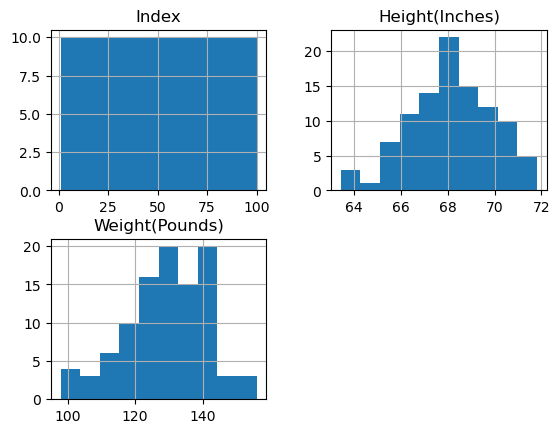

In [28]:
import matplotlib.pyplot as plt
df.hist()# Create histograms for all numerical columns


In [30]:
df.isna().sum() # Use this function to returns a DataFrame of the same shape as 'df' and chech if there is a missing value

Index             0
Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [31]:
# Define the target variable (Height in Inches) to be predicted
target = "Height(Inches)"

# Define the feature(s) (in this case, Weight in Pounds) used for prediction
feature = ["Weight(Pounds)"]

# Extract the feature data (Weight in Pounds) from the dataframe and store it in X_train
X_train = df[feature]

# Extract the target variable (Height in Inches) from the dataframe and store it in y_train
y_train = df[target]


In [9]:
y_train.shape # returns a tuple representing the dimensions of y_train, number of (rows (samples),columns (features)

(100,)

In [10]:
X_train.shape

(100, 1)

In [11]:
# baseline 
y_mean=y_train.mean()
y_mean


68.1410566

In [12]:
# calculate y_predict_baseline
y_predict_baseline=[y_mean]*len(y_train)
y_predict_baseline

[68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,
 68.1410566,

In [32]:
# mean absolute error
from sklearn.metrics import mean_absolute_error
mae_baseline=mean_absolute_error(y_train,y_predict_baseline)
mae_baseline

1.4683458680000003

In [33]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [34]:
model.fit(X_train,y_train)

LinearRegression()

In [35]:
y_predict_train=model.predict(X_train)
y_predict_train[:]

array([66.84515777, 68.72266919, 70.04437816, 69.1900013 , 69.34676425,
       67.66904029, 69.12281947, 68.7206714 , 66.79559648, 67.45845675,
       68.00061027, 66.93709628, 67.85350066, 67.60186644, 67.09241283,
       69.00317554, 68.16448537, 69.24097703, 68.83576035, 67.72837479,
       69.10571834, 69.28619911, 65.63924178, 68.16451733, 69.15122011,
       68.18223378, 69.19704153, 68.32813671, 66.47276086, 66.91705441,
       66.07074065, 67.46536113, 67.86771697, 68.70150855, 69.01148637,
       68.10426385, 69.14716859, 67.50358294, 68.31196257, 66.34323185,
       67.75353901, 67.79343897, 68.97709233, 68.79317536, 66.32232693,
       68.10547851, 69.45756993, 67.15094022, 69.29277585, 68.59842235,
       69.56450789, 67.91086134, 67.84336785, 67.06219019, 67.68396781,
       69.63408708, 70.27386882, 68.05036335, 67.35480318, 68.50910494,
       68.10296928, 68.80721586, 68.1851106 , 68.1102812 , 68.62910847,
       66.57496004, 69.20062957, 68.42393496, 66.08879272, 67.78

In [36]:
mae_predict=mean_absolute_error(y_train,y_predict_train)
mae_predict

1.259619080591162

In [37]:
intercept=model.intercept_
intercept

57.81572535134611

The intercept of the model is 57.81572535134611. This value represents the expected value of the dependent variable (y) when all the independent variables (X) are zero.

In [19]:
coefficient=model.coef_
coefficient

array([0.07991179])

The coefficient is an array [0.07991179]. This indicates the slope or weight of the independent variable in the linear regression. It show how much the dependent variable is expected to change when the independent variable increases by one unit. In this case, for every 1 unit increase in the independent variable, the dependent variable is expected to increase by approximately 0.0799. It means there is small positive relationship between the independent variable and the target.

In [20]:
R_square=model.score(X_train,y_train)
R_square

0.28077848720131826

The R-squared value is 0.280, which means that approximately 28.08% of the variance in the dependent variable is explained by the model. This is a measure of how well the independent variables explain the variation in the dependent variable.This R² value is closer to 0,  it means that the model doesn't explain much of the variation in the data.